# Business Understanding
1. Tujuan alalisis ini adalah untuk Memprediksi STATUS KELULUSAN (status kelulusan) mahasiswa berdasarkan informasi IPS dari semester 1 hingga IPS semester 8
2. Pertanyaan Kunci: Apa faktor yang mempengaruhi kelulusan tepat waktu? Seberapa akurat kita dapat memprediksi status kelulusan?

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Understanding
1. Dataset ini mencakup kolom NAMA MAHASISWA, JENIS KELAMIN, STATUS MAHASISWA, UMUR, STATUS NIKAH, IPS 1 hingga IPS 8, IPK, dan STATUS KELULUSAN.
2. Eksplorasi Data untuk memahami distribusi data, mengidentifikasi nilai yang hilang, dan mendeteksi outlier.

In [3]:
# Membaca file Excel
train_df = pd.read_excel('kelulusan_train.xls')
train_df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [4]:
test_df = pd.read_excel('kelulusan_test.xls')
test_df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# Data Preparation
1. Pembersihan Data: Menangani nilai yang hilang, mengganti 0.0 pada kolom IPS jika perlu, dan melakukan encoding pada variabel kategorikal.
2. Pemilihan Fitur: Memilih fitur yang relevan (JENIS KELAMIN, UMUR, IPS 1 hingga IPS 8, STATUS MAHASISWA, STATUS NIKAH).

In [5]:
# Menghapus kolom 'NAMA' di kedua dataset
train_df = train_df.drop(columns=['NAMA'])
test_df = test_df.drop(columns=['NAMA'])

In [6]:
train_df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [7]:
test_df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               4
IPK                 3
STATUS KELULUSAN    0
dtype: int64

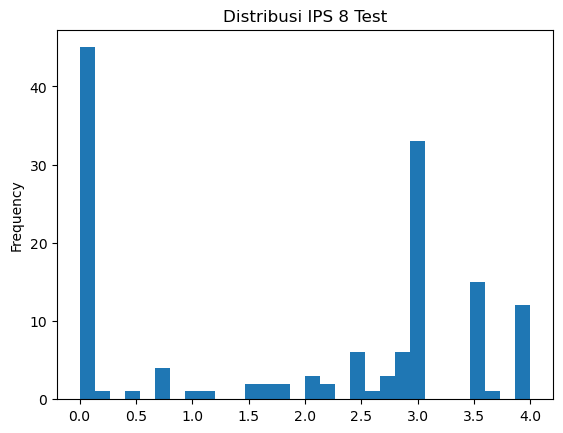

In [8]:
# Melihat distribusi nilai
#Pada Kolom IPS 8 dalam test_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPS 8 Test')
plt.show()

Karena IPS ini distribusinya tidak normal, maka kita akan menggunakan median untuk mengisi nilai yang hilang

In [9]:
test_df['IPS 8'].fillna(test_df['IPS 8'].median(), inplace=True)

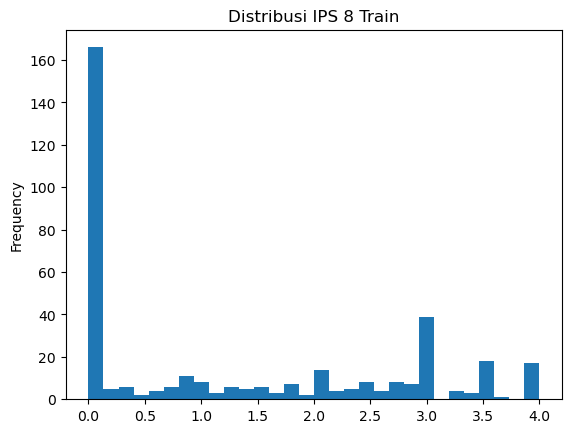

In [10]:
#Pada Kolom IPS 8 dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPS 8 Train')
plt.show()

In [11]:
train_df['IPS 8'].fillna(train_df['IPS 8'].median(), inplace=True)

*Menangani nilai IPK*

In [12]:
# Menghapus spasi ekstra dari nama kolom
test_df.columns = test_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(test_df.columns)

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1',
       'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK',
       'STATUS KELULUSAN'],
      dtype='object')


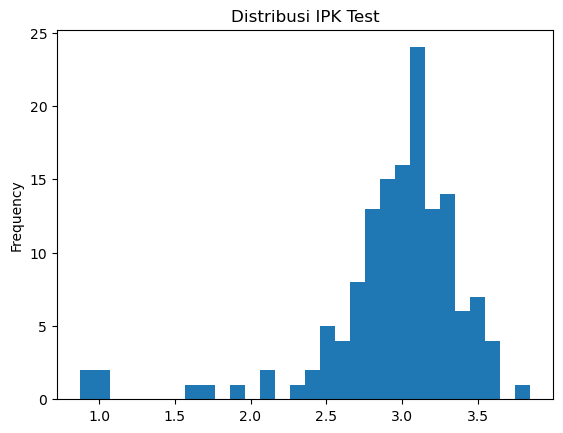

In [13]:
#Pada Kolom IPK dalam test_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK Test')
plt.show()

In [14]:
# Menghapus spasi ekstra dari nama kolom
train_df.columns = train_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(train_df.columns)

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1',
       'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK',
       'STATUS KELULUSAN'],
      dtype='object')


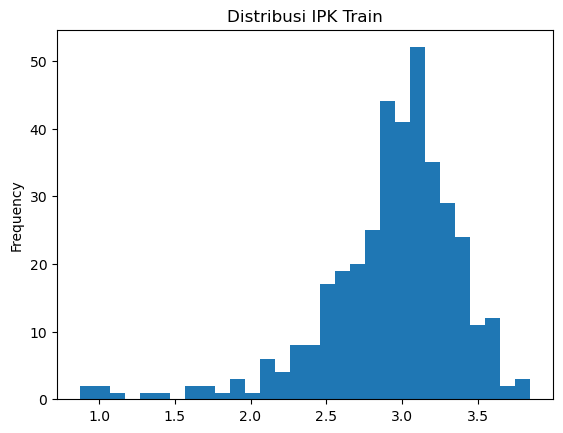

In [15]:
#Pada Kolom IPK dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK Train')
plt.show()

In [16]:
import numpy as np
# Menghitung nilai IPK
test_df['IPK'] = test_df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].replace(0, np.nan).mean(axis=1)
train_df['IPK'] = train_df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].replace(0, np.nan).mean(axis=1)

In [17]:
test_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.675714,TEPAT
1,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.051250,TEPAT
2,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.542500,TEPAT
3,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.460000,TEPAT
4,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.080000,TEPAT


In [18]:
train_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,2.991429,TERLAMBAT
1,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.114286,TERLAMBAT
2,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.538571,TERLAMBAT
3,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.445714,TERLAMBAT
4,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.000000,TERLAMBAT


#Mengeksplorasi Nilai 0.0 pada beberapa kolom


Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:
STATUS KELULUSAN
TEPAT        42
TERLAMBAT     2
Name: count, dtype: int64


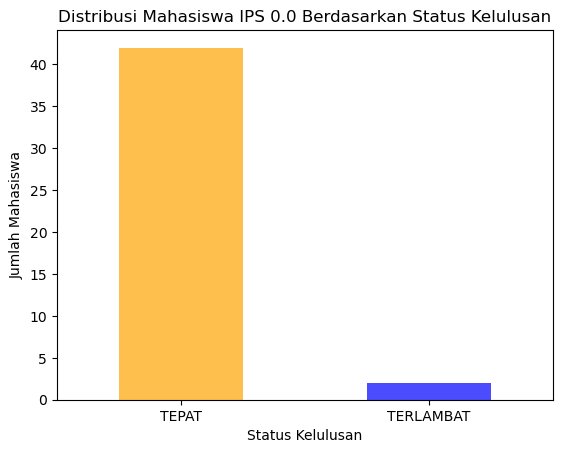

In [19]:
# Filter test_df dengan IPS = 0.0
ips_0 = test_df[test_df['IPS 8'] == 0.0]

# Hitung jumlah mahasiswa berdasarkan status kelulusan
jumlah_per_status = ips_0['STATUS KELULUSAN'].value_counts()

# Print hasil
print("Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:")
print(jumlah_per_status)

# Visualisasi (opsional)
import matplotlib.pyplot as plt

jumlah_per_status.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)
plt.title('Distribusi Mahasiswa IPS 0.0 Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.show()


Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:
STATUS KELULUSAN
TEPAT        95
TERLAMBAT    69
Name: count, dtype: int64


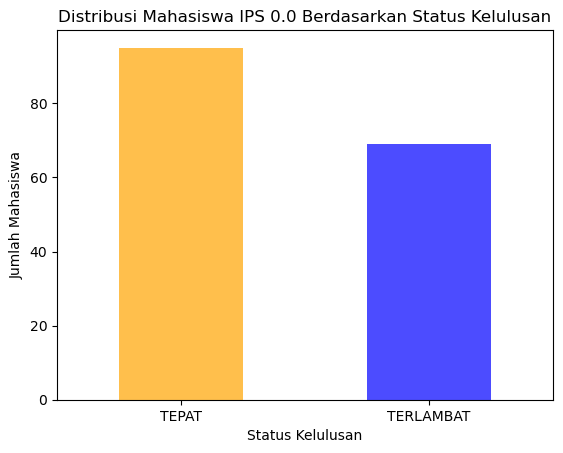

In [20]:
# Filter train_df dengan IPS = 0.0
ips_0 = train_df[train_df['IPS 8'] == 0.0]

# Hitung jumlah mahasiswa berdasarkan status kelulusan
jumlah_per_status = ips_0['STATUS KELULUSAN'].value_counts()

# Print hasil
print("Jumlah Mahasiswa dengan IPS 0.0 berdasarkan Status Kelulusan:")
print(jumlah_per_status)

# Visualisasi (opsional)
import matplotlib.pyplot as plt

jumlah_per_status.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)
plt.title('Distribusi Mahasiswa IPS 0.0 Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.show()


Secara logis, mahasiswa yang lulus tepat waktu di semester 7, seharusnya tidak memiliki nilai di semester 8 karena mereka sudah selesai menyelesaikan seluruh mata kuliah yang dibutuhkan. Jadi, nilai 0.0 pada semester 8 seharusnya dianggap tidak valid atau mencurigakan, terutama jika ini terjadi pada mahasiswa yang sudah menyelesaikan studi mereka.
Jika nilai 0.0 muncul pada mahasiswa yang sudah lulus tepat waktu, ini bisa menunjukkan adanya kesalahan input data, atau mungkin sistem kampus secara otomatis memberikan nilai 0.0 untuk mahasiswa yang tidak mengikuti mata kuliah pada semester 8.

Jadi pada mahasiswa yang lulus tepat waktu: Nilai 0.0 bisa jadi outlier, karena secara logis, mahasiswa yang sudah lulus tidak seharusnya memiliki nilai pada semester 8. Kemungkinan besar ini merupakan kesalahan data, atau nilai 0.0 diberikan karena alasan administratif. Dalam hal ini, perlu ada klarifikasi dengan pihak kampus atau bisa jadi perlu mengganti nilai tersebut jika dianggap tidak relevan.

Pada mahasiswa yang terlambat lulus: Nilai 0.0 lebih mungkin valid, karena bisa jadi mereka memang tidak mendapatkan nilai pada semester 8. Namun, jika mahasiswa ini sebenarnya diharapkan memiliki nilai di semester 8, maka nilai 0.0 bisa menjadi indikasi masalah atau kesalahan pencatatan.

hasilnya pada data test_df dan train_ df ini saya akan mengisi nilai 0.0 pada mahasiswa yang lulus tepat waktu dengan median karena agar distribusinya menjadi lebih normal

In [21]:
import pandas as pd

# Menggunakan DataFrame 'test_df' yang sudah ada
# Menyaring mahasiswa yang memiliki nilai 0.0 pada semester 8 dan lulus tepat waktu
mahasiswa_tetap_waktu = test_df[(test_df['IPS 8'] == 0.0) & (test_df['STATUS KELULUSAN'] == 'TEPAT')]

# Menghitung median dari IPS 8 (tanpa 0.0)
median_ips_8 = test_df[test_df['IPS 8'] != 0.0]['IPS 8'].median()

# Mengganti nilai 0.0 pada mahasiswa yang lulus tepat waktu dengan median
test_df.loc[(test_df['IPS 8'] == 0.0) & (test_df['STATUS KELULUSAN'] == 'TEPAT'), 'IPS 8'] = median_ips_8

# Cek hasil perubahan
test_df.head() # Menampilkan beberapa data untuk memastikan perubahan


,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,3.00,2.675714,TEPAT
1,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.051250,TEPAT
2,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.542500,TEPAT
3,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.460000,TEPAT
4,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,3.00,3.080000,TEPAT


In [22]:
import pandas as pd

# Menggunakan DataFrame 'train_df' yang sudah ada
# Menyaring mahasiswa yang memiliki nilai 0.0 pada semester 8 dan lulus tepat waktu
mahasiswa_tetap_waktu = train_df[(train_df['IPS 8'] == 0.0) & (train_df['STATUS KELULUSAN'] == 'TEPAT')]

# Menghitung median dari IPS 8 (tanpa 0.0)
median_ips_8 = train_df[train_df['IPS 8'] != 0.0]['IPS 8'].median()

# Mengganti nilai 0.0 pada mahasiswa yang lulus tepat waktu dengan median
train_df.loc[(train_df['IPS 8'] == 0.0) & (train_df['STATUS KELULUSAN'] == 'TEPAT'), 'IPS 8'] = median_ips_8

# Cek hasil perubahan
train_df.head()  # Menampilkan beberapa data untuk memastikan perubahan

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,2.991429,TERLAMBAT
1,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.114286,TERLAMBAT
2,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.538571,TERLAMBAT
3,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.445714,TERLAMBAT
4,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.000000,TERLAMBAT


In [23]:
from sklearn.preprocessing import LabelEncoder

# Daftar kolom yang akan di-encode
columns_to_encode = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Proses encoding untuk setiap kolom
for col in columns_to_encode:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

In [24]:
test_df

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,24,0,3.17,2.70,3.23,2.41,3.00,2.47,1.75,3.00,2.675714,0
1,1,1,26,0,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.051250,0
2,0,1,29,0,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.542500,0
3,0,1,27,0,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.460000,0
4,1,1,25,0,3.19,3.08,3.31,2.83,3.36,2.73,3.06,3.00,3.080000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,1,23,0,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,2.531250,0
141,1,0,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.870000,0
142,1,1,23,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.870000,0
143,1,1,23,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.013750,0


In [25]:
#Import the StandardScaler class
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']] = scaler.fit_transform(test_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']])
test_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,0.111111,0,0.718750,0.668693,0.807895,0.582173,0.705660,0.626904,0.447570,0.7500,0.663632,0
1,1,1,0.222222,0,0.942708,0.911854,0.857895,0.704735,0.822642,0.748731,0.557545,0.6500,0.786356,0
2,0,1,0.388889,0,0.458333,0.656535,0.728947,0.785515,0.675472,0.670051,0.736573,0.1250,0.620098,0
3,0,1,0.277778,0,0.359375,0.717325,0.507895,0.621170,0.535849,0.616751,0.652174,0.5425,0.593137,0
4,1,1,0.166667,0,0.729167,0.784195,0.828947,0.699164,0.841509,0.692893,0.782609,0.7500,0.795752,0


In [26]:
#Import the StandardScaler class
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']] = scaler.fit_transform(train_df[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK']])
train_df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,0.214286,0,0.702312,0.664740,0.800000,0.810742,0.755435,0.7500,0.774936,0.0,0.734694,1
1,1,1,0.357143,0,0.771676,0.809249,0.784211,0.803069,0.717391,0.7825,0.831202,0.0,0.773162,1
2,1,0,0.250000,0,0.916185,0.809249,0.931579,0.841432,0.904891,0.9300,0.953964,0.0,0.906011,1
3,1,1,0.178571,0,0.820809,0.841040,0.907895,0.859335,0.891304,0.9075,0.884910,0.0,0.876936,1
4,1,0,0.250000,0,0.742775,0.690751,0.826316,0.728900,0.755435,0.7500,0.787724,0.0,0.737378,1


In [27]:
# memastikan kolom train dan test sesuai
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
print(train_df.columns)

Index(['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1',
       'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK',
       'STATUS KELULUSAN'],
      dtype='object')


In [29]:
# Memisahkan fitur dan target seperti sebelumnya
X_train = train_df.drop(columns=['STATUS KELULUSAN'])
y_train = train_df['STATUS KELULUSAN']

X_test = test_df.drop(columns=['STATUS KELULUSAN'])
y_test = test_df['STATUS KELULUSAN'] 

# Pemodelan
1. Pemilihan Model: Memilih algoritma klasifikasi, pada dataset ini akan digunakan Knn.
2. Pelatihan Model: menggunakan dataset pelatihan dan pengujian, kemudian melatih model.

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)  # Menguji nilai k dari 1 hingga 20
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

optimal_k = k_range[np.argmax(cv_scores)]  # Menemukan k dengan akurasi tertinggi
print(f"Optimal k: {optimal_k}")


Optimal k: 4


In [31]:
# Inisialisasi model KNN dengan jumlah tetangga k = 4
knn = KNeighborsClassifier(n_neighbors=4)

# Latih model dengan data training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
# Prediksi dengan data test
y_pred = knn.predict(X_test)

# Evaluasi model menggunakan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Accuracy: 0.9793103448275862
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.40      1.00      0.57         2

    accuracy                           0.98       145
   macro avg       0.70      0.99      0.78       145
weighted avg       0.99      0.98      0.98       145



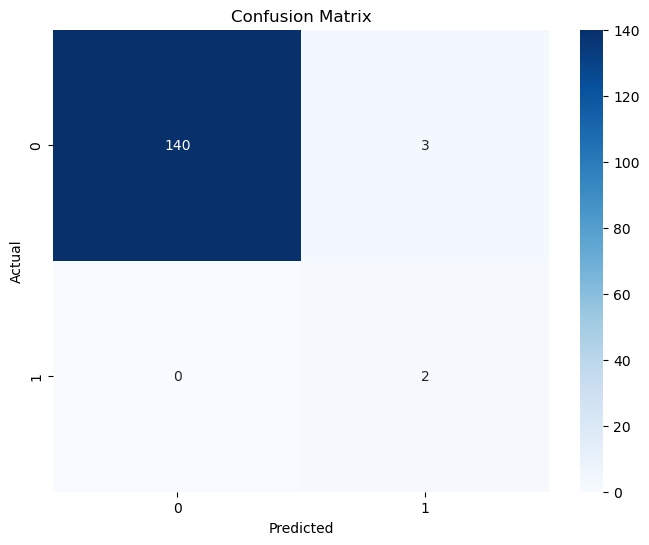

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menghitung confusion matrix atau mengevaluasi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

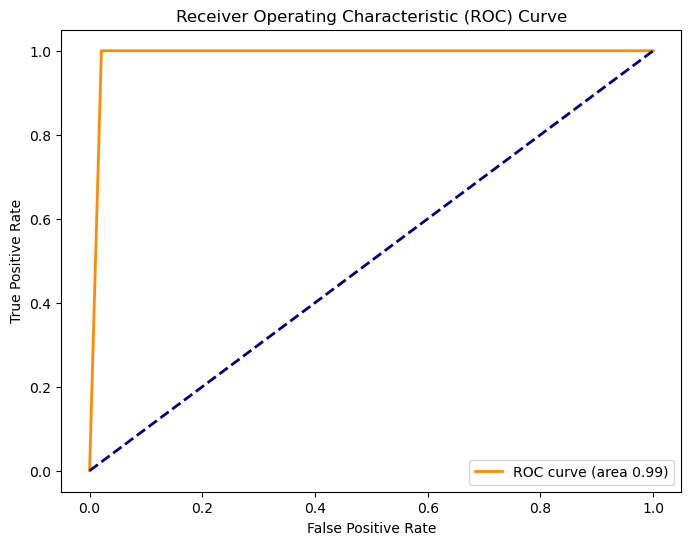

In [34]:
# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluasi
Evaluasi Model: Mengevaluasi kinerja model menggunakan metrik seperti akurasi, precision, recall, dan F1-score.

In [35]:
# Evaluasi Model
y_pred = knn.predict(X_test)

# Confusion Matrix dan Classification Report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[140   3]
 [  0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.40      1.00      0.57         2

    accuracy                           0.98       145
   macro avg       0.70      0.99      0.78       145
weighted avg       0.99      0.98      0.98       145

